In [3]:
from app.parser import *

In [21]:

def group_by_day(chats_dict_by_hooman, hooman=None):
    if hooman:
        messages = chats_dict_by_hooman[hooman]
    else:
        messages = []
        for hooman in chats_dict_by_hooman:
            messages.extend(chats_dict_by_hooman[hooman])

    grouped = {}
    #print(messages)
    for message in messages:
        date = message["timestamp"]#.strftime('%b %d, %Y')
        # this needs to bo done so that grouping is done
        date = datetime(date.year, date.month, date.day)
        if date not in grouped:
            grouped[date] = []
        
        grouped[date].append(message["content"])

    # join into single string
    for key in grouped:
        grouped[key] = ". ".join(grouped[key])
    
    return grouped    

In [22]:
chats_dict_by_hooman = parse_messenger()

grouped = group_by_day(chats_dict_by_hooman, hooman=None)
#grouped = group_by_day(messages)
grouped;
#messages

In [23]:
from datetime import datetime, timedelta
def get_counts_by_day(messages_grouped_by_day, min_day=None, max_day=None):
    if not min_day:
        min_day = min(list(grouped.keys()))
    if not max_day:
        max_day = max(list(grouped.keys()))
    i = 1
    curr_day = min_day + timedelta(days=1)
    while curr_day < max_day:
        if curr_day not in grouped:
            grouped[curr_day] = ''
        curr_day += timedelta(days=1)        
        i += 1

    counts_by_day = {day: len(grouped[day]) for day in grouped}

    #counts_by_day
    #max_day
    return counts_by_day, min_day, max_day

In [24]:
counts_by_day, min_day, max_day = get_counts_by_day(grouped);

In [25]:
counts_by_day_sorted = sorted([(k, counts_by_day[k]) for k in counts_by_day])
counts_by_day_sorted;

<ipython-input-28-cfaa70d1b6bc>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels)


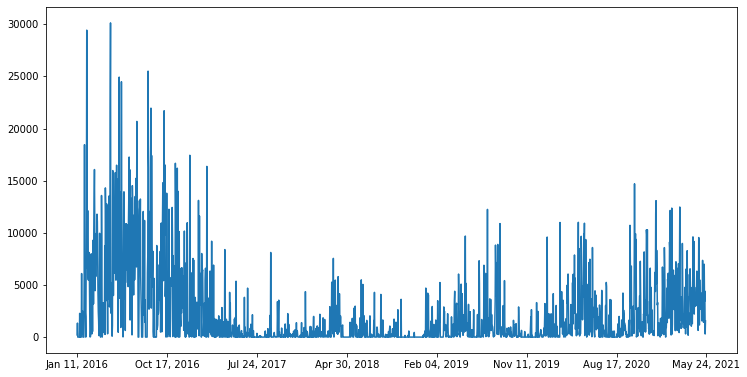

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

days = [x[0] for x in counts_by_day_sorted]
counts = [x[1] for x in counts_by_day_sorted]
ax.plot(counts)
#ax.set_yscale('log')
n = len(counts)
from numpy import ceil
from time import strftime
n_ticks = 8
tick_interval = ceil(n/(n_ticks-1))
tick_labels = [(min_day + timedelta(days=i*tick_interval)).strftime('%b %d, %Y') for i in range(n_ticks)]
ticks = [i*tick_interval for i in range(n_ticks)]
ax.set_xticklabels(tick_labels)
ax.set_xticks(ticks);

In [38]:
from datetime import datetime, timedelta
datetime(2021,5,1) + timedelta(days=1)

datetime.datetime(2021, 5, 2, 0, 0)